In [2]:
from commons import *
from libruntimepredictionanalysis import *
from tqdm import tqdm_notebook as tqdm

# 1. Preliminaries: Pre-Processor Runtime Visualizations

In [22]:
df = pd.read_csv("preprocessor_runtimes_dup2.csv")

In [26]:
df = df.query("traintime >= 0")
df = df[df["exception"].isnull()]

In [29]:
df

,openmlid,algo,datapoints,trainpoints,applicationpoints,attributes,seed,numinstances_before,numattributes_before,numlabels_before,...,accvarianceabs6_after,accvarianceabs7_after,accvarianceabs8_after,accvarianceabs9_after,accvarianceabs10_after,totalvariance_after,memory_peak,traintime,applicationtime,exception
1,41066,bf/cfssubseteval,1567,10,1557,1,1,10.0,1.0,2.0,...,1.115211,1.115211,1.115211,1.115211,1.115211,1.115211,4.921871e+09,0.0,0.0,NaN
4,41066,bf/cfssubseteval,1567,10,1557,2,1,10.0,2.0,2.0,...,323.224290,323.224290,323.224290,323.224290,323.224290,323.224290,4.022733e+09,0.0,0.0,NaN
5,41066,bf/cfssubseteval,1567,10,1557,1,2,10.0,1.0,1.0,...,277.290694,277.290694,277.290694,277.290694,277.290694,277.290694,8.069658e+09,0.0,0.0,NaN
6,41066,bf/cfssubseteval,1567,100,1467,1,1,100.0,1.0,2.0,...,0.302859,0.302859,0.302859,0.302859,0.302859,0.302859,5.226105e+09,0.0,0.0,NaN
8,41066,bf/cfssubseteval,1567,10,1557,3,0,10.0,3.0,2.0,...,0.239645,0.239645,0.239645,0.239645,0.239645,0.239645,9.142312e+09,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212642,40971,SymmetricalUncertAS,1000,10,990,10,9,10.0,10.0,10.0,...,123619.471931,123619.571931,123619.671931,123619.771931,123619.871931,123620.642752,1.017373e+10,0.0,0.0,NaN
1212669,40971,SymmetricalUncertAS,1000,10,990,20,9,10.0,20.0,10.0,...,123634.119362,123634.863083,123635.486667,123635.848711,123636.151099,123639.064873,6.185055e+09,0.0,0.0,NaN
1212702,40971,SymmetricalUncertAS,1000,100,900,20,8,100.0,20.0,30.0,...,82384.010998,82384.658783,82385.199351,82385.734955,82386.266192,82389.398768,1.037206e+10,0.0,0.0,NaN
1212710,40971,SymmetricalUncertAS,1000,100,900,10,9,100.0,10.0,29.0,...,84884.133043,84884.284059,84884.367548,84884.420520,84884.430520,84885.420520,4.883329e+09,0.0,0.0,NaN


In [77]:
def removeOutliersFromBatches(df):
    algorithms = pd.unique(df["algo"])
    datasets = pd.unique(df["openmlid"])
    trainsizes = pd.unique(df["trainpoints"])
    attributeSpace = pd.unique(df["attributes"])
    print("Size before: " + str(len(df)))
    for i, algo in enumerate(algorithms):
        print("Remove outliers for " + algo)
        cDF = df.query(" algo == '" + algo + "'")
        numDatasets = len(datasets)
        for j, d in enumerate(datasets):
            print("\tds " + str(d))
            dDF = cDF.query("openmlid == " + str(d))
            for size in trainsizes:
                for attributes in attributeSpace:
                    rDF = dDF.query("trainpoints == " + str(size) + " and attributes == " + str(attributes))
                    if len(rDF) >= 4:
                        q3 = np.max([1, np.quantile(rDF["traintime"], .75)])
                        outliers = rDF.query("traintime > " + str(q3 * 10))
                        if len(outliers) > 0:
                            df = df.drop(index = outliers.index)
                            print("\t\tremoved outlier with values " + str(outliers["traintime"].values) + " in batch with " + str(len(rDF)) + " entries, mean " + str(np.mean(rDF["traintime"])) + " and q3 " + str(q3))

    print("Size after outlier removal: " + str(len(df)))
    return df
adf = removeOutliersFromBatches(adf)

Size before: 303273
Remove outliers for bf/cfssubseteval
	ds 41066
	ds 41065
	ds 41064
	ds 3
	ds 31
	ds 60
	ds 40685
	ds 183
	ds 1501
	ds 554
	ds 1457
	ds 40691
	ds 40975
	ds 4136
	ds 4137
	ds 41026
	ds 1485
	ds 40926
	ds 40927
	ds 181
	ds 40497
	ds 23512
	ds 1486
	ds 41146
	ds 41143
	ds 1037
	ds 1039
	ds 1242
	ds 1216
	ds 1042
	ds 1569
	ds 4541
	ds 4552
	ds 23380
	ds 273
	ds 41991
	ds 1142
	ds 1146
	ds 1134
	ds 1138
	ds 1139
	ds 1128
	ds 1130
	ds 1112
	ds 1114
		removed outlier with values [24.] in batch with 9 entries, mean 3.111111111111111 and q3 1.0
	ds 1161
	ds 1166
	ds 41164
	ds 40900
	ds 41946
	ds 40971
Remove outliers for gsw/cfssubseteval
	ds 41066
	ds 41065
	ds 41064
	ds 3
	ds 31
	ds 60
	ds 40685
	ds 183
	ds 1501
	ds 554
	ds 1457
	ds 40691
	ds 40975
	ds 4136
	ds 4137
	ds 41026
	ds 1485
	ds 40926
	ds 40927
	ds 181
	ds 40497
	ds 23512
	ds 1486
	ds 41146
	ds 41143
	ds 1037
	ds 1039
	ds 1242
	ds 1216
	ds 1042
	ds 1569
	ds 4541
	ds 4552
	ds 23380
	ds 273
	ds 41991
	ds 1142
	ds 11

In [30]:
algorithms = pd.unique(df["algo"])

In [47]:
df.query("applicationpoints > 1000000")

,openmlid,algo,datapoints,trainpoints,applicationpoints,attributes,seed,numinstances_before,numattributes_before,numlabels_before,...,accvarianceabs6_after,accvarianceabs7_after,accvarianceabs8_after,accvarianceabs9_after,accvarianceabs10_after,totalvariance_after,memory_peak,traintime,applicationtime,exception
666802,1216,bf/cfssubseteval,1496391,10,1496381,1,0,10.0,1.0,2.0,...,5.444444e-01,5.444444e-01,5.444444e-01,5.444444e-01,5.444444e-01,5.444444e-01,1.057555e+10,0.0,0.0,NaN
666803,1216,bf/cfssubseteval,1496391,10,1496381,1,1,10.0,1.0,2.0,...,3.555556e+00,3.555556e+00,3.555556e+00,3.555556e+00,3.555556e+00,3.555556e+00,1.071287e+10,0.0,0.0,NaN
666804,1216,bf/cfssubseteval,1496391,100,1496291,1,0,100.0,1.0,2.0,...,5.304040e-01,5.304040e-01,5.304040e-01,5.304040e-01,5.304040e-01,5.304040e-01,5.612124e+09,0.0,0.0,NaN
666805,1216,bf/cfssubseteval,1496391,10,1496381,2,0,10.0,2.0,2.0,...,1.163943e+12,1.163943e+12,1.163943e+12,1.163943e+12,1.163943e+12,1.163943e+12,4.326486e+09,1.0,0.0,NaN
666806,1216,bf/cfssubseteval,1496391,10,1496381,2,1,10.0,2.0,2.0,...,2.114210e+13,2.114210e+13,2.114210e+13,2.114210e+13,2.114210e+13,2.114210e+13,5.079539e+09,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736493,1569,SymmetricalUncertAS,1025000,20000,1005000,8,9,20000.0,8.0,8.0,...,4.581438e+01,4.705883e+01,4.829756e+01,4.829756e+01,4.829756e+01,4.829756e+01,8.230422e+09,0.0,0.0,NaN
736568,1569,SymmetricalUncertAS,1025000,20000,1005000,9,9,20000.0,9.0,8.0,...,5.870680e+01,5.995483e+01,6.119928e+01,6.243801e+01,6.243801e+01,6.243801e+01,8.499960e+09,0.0,0.0,NaN
736575,1569,SymmetricalUncertAS,1025000,20000,1005000,10,8,20000.0,10.0,8.0,...,7.133477e+01,7.258413e+01,7.383226e+01,7.507671e+01,7.631544e+01,7.631544e+01,1.246558e+10,1.0,0.0,NaN
736581,1569,SymmetricalUncertAS,1025000,10000,1015000,10,9,10000.0,10.0,8.0,...,7.158687e+01,7.284039e+01,7.408848e+01,7.533218e+01,7.657367e+01,7.657367e+01,1.588761e+09,0.0,0.0,NaN


['bf/cfssubseteval' 'gsw/cfssubseteval' 'correlationAS' 'PCAAS'
 'ReliefFAS' 'GainRatioAS' 'InfoGainAS' 'SymmetricalUncertAS' 'OneRAS']


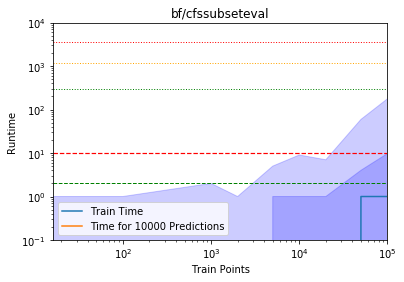

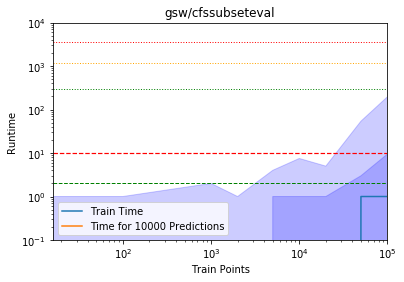

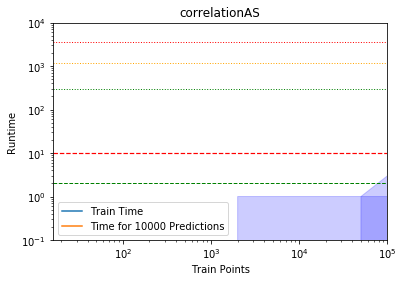

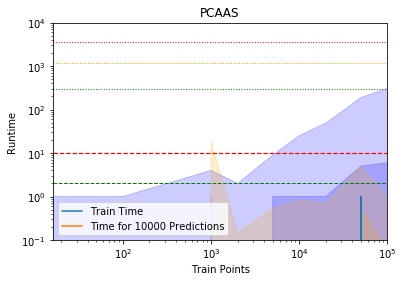

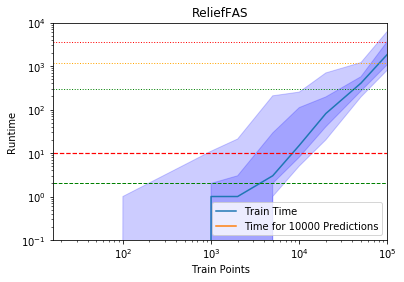

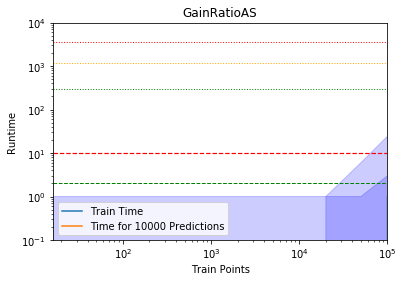

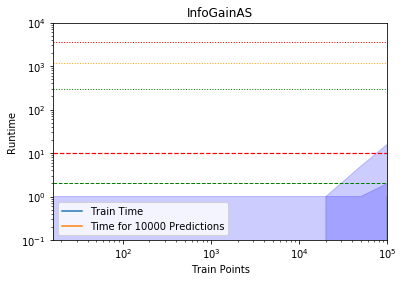

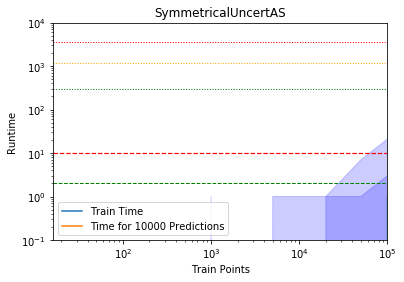

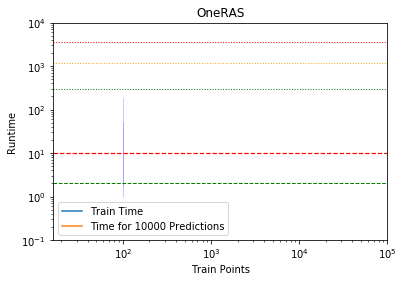

In [79]:
def plotRuntimesOverNumbersOfInstances(cData, numPredictions, title):
    trainpoints = np.unique(cData["trainpoints"].values)
    trainpoints = trainpoints[trainpoints >= 10]
    q1aPointsY = []
    q3aPointsY = []
    q1bPointsY = []
    q3bPointsY = []
    medianPointsY = []
    q1aPointsZ = []
    q3aPointsZ = []
    q1bPointsZ = []
    q3bPointsZ = []
    medianPointsZ = []
    validTrainPoints = []
    #pointsY = []
    for tp in trainpoints:
        rData = cData.query("trainpoints == " + str(tp))
        y = numPredictions * rData["applicationtime"] / rData["applicationpoints"]
        y = y[~np.isnan(y)]
        z = rData["traintime"]
        #for i, v in enumerate(y):
        #    print(v)
        if len(y) > 4:
            validTrainPoints.append(tp)
            q1aPointsY.append(np.quantile(y, 0.1))
            q1bPointsY.append(np.quantile(y, 0.25))
            medianPointsY.append(np.median(y))
            q3aPointsY.append(np.quantile(y, 0.9))
            q3bPointsY.append(np.quantile(y, 0.75))
            
            q1aPointsZ.append(np.quantile(z, 0.1))
            q1bPointsZ.append(np.quantile(z, 0.25))
            medianPointsZ.append(np.median(z))
            q3aPointsZ.append(np.quantile(z, 0.9))
            q3bPointsZ.append(np.quantile(z, 0.75))
            #print(str(tp) + ": " + str(v))
        #meanPoints.append(np.mean(y))
        #pointsY.append(v)

    plt.figure()
    plt.title(title)# + " (train prediction RMSE quantile for 30s/1m/2m/5m/20m error: " + str(np.round(sp.stats.percentileofscore(metricRMSETrain[:,i], 30), 2)) + "/" + str(np.round(sp.stats.percentileofscore(metricRMSETrain[:,i], 60), 2)) + "/" + str(np.round(sp.stats.percentileofscore(metricRMSETrain[:,i], 120), 2)) + "/" + str(np.round(sp.stats.percentileofscore(metricRMSETrain[:,i], 300), 2)) + "/" + str(np.round(sp.stats.percentileofscore(metricRMSETrain[:,i], 1200), 2)) + ")")
    #plt.boxplot(points, 0, '')
    if len(q1aPointsY) > 0:
        #plt.plot(validTainPoints, q1Points)
        plt.plot(validTrainPoints, medianPointsZ)
        plt.fill_between(validTrainPoints, q1aPointsZ, q3aPointsZ, color="blue",alpha=0.2)
        plt.fill_between(validTrainPoints, q1bPointsZ, q3bPointsZ, color="blue", alpha=0.2)
        plt.plot(validTrainPoints, medianPointsY)
        plt.fill_between(validTrainPoints, q1aPointsY, q3aPointsY, color="orange", alpha=0.2)
        plt.fill_between(validTrainPoints, q1bPointsY, q3bPointsY, color="orange", alpha=0.2)
        plt.axhline(10, color="red", linestyle="--", linewidth="1.2")
        plt.axhline(2, color="green", linestyle="--", linewidth="1")
        plt.axhline(300, color="green", linestyle=":", linewidth="1")
        plt.axhline(1200, color="orange", linestyle=":", linewidth="1")
        plt.axhline(3600, color="red", linestyle=":", linewidth="1")
        #plt.plot(validTainPoints, q3Points)
        #plt.xticks(trainpoints)
        #plt.scatter(trainpoints, meanPoints, color="green")
        #if len(points) > 0:
        plt.xlabel("Train Points")
        plt.ylabel("Runtime")
        plt.xscale("log")
        plt.xlim([16,100000])
        plt.ylim([0.1,10000])
        plt.yscale("log")
        legend=["Train Time", "Time for " + str(numPredictions) +" Predictions"]
        plt.legend(legend)
        
print(algorithms)
for i, a in enumerate(algorithms):
    plotRuntimesOverNumbersOfInstances(adf.query("algo == '" + a + "'"), 10000, a)

        

# 2. Dispersion (Difficulty of the Learning Problem)

In [78]:
## FIRST STEP: Determining the dispersion (and "non-determinism") in the observed data
## Compute, for each classifier, the average variance in the execution times
import scipy
mstds = {}
stds = {}
for i, algo in enumerate(tqdm(algorithms)):
    cdf = df.query("algo == '" + algo + "'")
    combinations = cdf[["openmlid", "trainpoints", "attributes"]].drop_duplicates()
    observations = []
    for combo in combinations.values:
        runs = cdf.query("openmlid == '" + str(combo[0]) + "' and trainpoints == '" + str(combo[1]) + "' and attributes == " + str(combo[2]))[["traintime"]]
        var = np.std(runs.values)
        observations.append(var)
    mstds[algo] = scipy.stats.trim_mean(observations, 0.05)
    stds[algo] = np.std(cdf[["traintime"]].values)


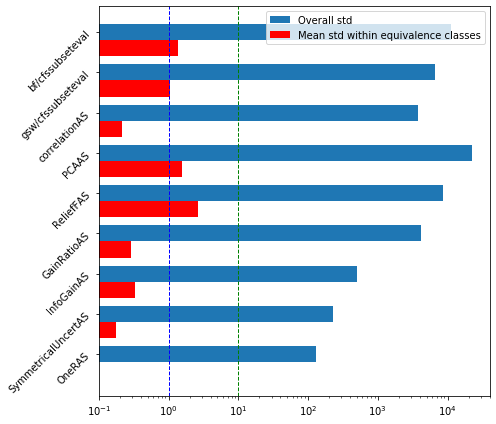

In [75]:
plt.figure(figsize=(7,6))
ind = np.arange(len(stds))
width=0.4
plt.barh(ind, list(stds.values()), width, label="Overall std")
plt.barh(ind + width, list(mstds.values()), width, color="red", label="Mean std within equivalence classes")
plt.yticks(range(len(stds)), list(stds.keys()), rotation=45)
plt.xscale("log")
plt.gca().invert_yaxis()
plt.axvline(1, color="blue", linestyle="--", linewidth="1")
plt.axvline(10, color="green", linestyle="--", linewidth="1")
plt.legend()
plt.tight_layout()
plt.savefig("basealg-stds.pdf")
plt.show()

# 3. Generalization Performance for Full Knowledge Exploitation

,openmlid,algo,datapoints,trainpoints,applicationpoints,attributes,seed,numinstances_before,numattributes_before,numlabels_before,...,accvarianceabs6_after,accvarianceabs7_after,accvarianceabs8_after,accvarianceabs9_after,accvarianceabs10_after,totalvariance_after,memory_peak,traintime,applicationtime,exception
1,41066,bf/cfssubseteval,1567,10,1557,1,1,10.0,1.0,2.0,...,1.115211,1.115211,1.115211,1.115211,1.115211,1.115211,4.921871e+09,0.0,0.0,NaN
4,41066,bf/cfssubseteval,1567,10,1557,2,1,10.0,2.0,2.0,...,323.224290,323.224290,323.224290,323.224290,323.224290,323.224290,4.022733e+09,0.0,0.0,NaN
5,41066,bf/cfssubseteval,1567,10,1557,1,2,10.0,1.0,1.0,...,277.290694,277.290694,277.290694,277.290694,277.290694,277.290694,8.069658e+09,0.0,0.0,NaN
6,41066,bf/cfssubseteval,1567,100,1467,1,1,100.0,1.0,2.0,...,0.302859,0.302859,0.302859,0.302859,0.302859,0.302859,5.226105e+09,0.0,0.0,NaN
8,41066,bf/cfssubseteval,1567,10,1557,3,0,10.0,3.0,2.0,...,0.239645,0.239645,0.239645,0.239645,0.239645,0.239645,9.142312e+09,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212642,40971,SymmetricalUncertAS,1000,10,990,10,9,10.0,10.0,10.0,...,123619.471931,123619.571931,123619.671931,123619.771931,123619.871931,123620.642752,1.017373e+10,0.0,0.0,NaN
1212669,40971,SymmetricalUncertAS,1000,10,990,20,9,10.0,20.0,10.0,...,123634.119362,123634.863083,123635.486667,123635.848711,123636.151099,123639.064873,6.185055e+09,0.0,0.0,NaN
1212702,40971,SymmetricalUncertAS,1000,100,900,20,8,100.0,20.0,30.0,...,82384.010998,82384.658783,82385.199351,82385.734955,82386.266192,82389.398768,1.037206e+10,0.0,0.0,NaN
1212710,40971,SymmetricalUncertAS,1000,100,900,10,9,100.0,10.0,29.0,...,84884.133043,84884.284059,84884.367548,84884.420520,84884.430520,84885.420520,4.883329e+09,0.0,0.0,NaN
